In [1]:
#Domowe nr 2 Adam Heinrich, Zuzanna Deska, SI grupa1 Plane,cat,truck

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import cv2
from sklearn import metrics
import seaborn as sns
import pandas as pd
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
#loading data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

index_train = np.where((y_train == 0) | (y_train == 3) | (y_train == 9))
index_test = np.where((y_test == 0) | (y_test == 3) | (y_test == 9))

X_train = X_train[index_train[0]]
y_train = y_train[index_train[0]]
X_test = X_test[index_test[0]]
y_test = y_test[index_test[0]]

print ('Train image shape:    {0}'.format(X_train.shape))
print ('Train label shape:    {0}'.format(y_train.shape))
print ('Test image shape:     {0}'.format(X_test.shape))
print ('Test label shape:     {0}'.format(y_test.shape))

Train image shape:    (15000, 32, 32, 3)
Train label shape:    (15000, 1)
Test image shape:     (3000, 32, 32, 3)
Test label shape:     (3000, 1)


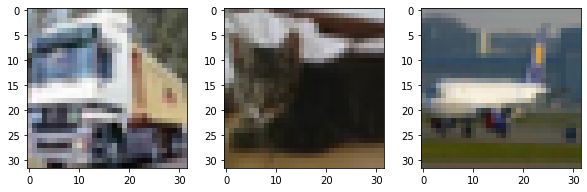

In [4]:
#visualizing data

plt.figure(figsize=(10, 10)) 
plt.subplot(3, 3, 1)
plt.imshow(X_train[0])
plt.subplot(3, 3, 2)
plt.imshow(X_train[2])
plt.subplot(3, 3, 3)
plt.imshow(X_train[30])
plt.show()

In [5]:
#converting into grayscale

X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])
print ('Train image shape:    {0}'.format(X_train.shape))
print ('Train label shape:    {0}'.format(y_train.shape))
print ('Test image shape:     {0}'.format(X_test.shape))
print ('Test label shape:     {0}'.format(y_test.shape))

Train image shape:    (15000, 32, 32)
Train label shape:    (15000, 1)
Test image shape:     (3000, 32, 32)
Test label shape:     (3000, 1)


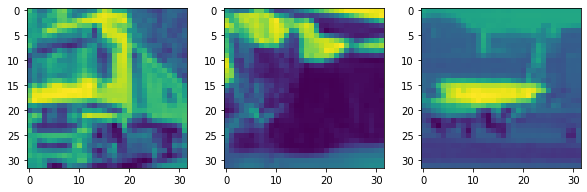

In [6]:
#visualizing data

plt.figure(figsize=(10, 10)) 
plt.subplot(3, 3, 1)
plt.imshow(X_train[0])
plt.subplot(3, 3, 2)
plt.imshow(X_train[2])
plt.subplot(3, 3, 3)
plt.imshow(X_train[30])
plt.show()

In [7]:
#preprocessing: normalize

X_train  = X_train/255
X_test  = X_test/255
print ('Train image shape:    {0}'.format(X_train.shape))
print ('Train label shape:    {0}'.format(y_train.shape))
print ('Test image shape:     {0}'.format(X_test.shape))
print ('Test label shape:     {0}'.format(y_test.shape))

Train image shape:    (15000, 32, 32)
Train label shape:    (15000, 1)
Test image shape:     (3000, 32, 32)
Test label shape:     (3000, 1)


In [8]:
#One Hot Encoding
y_test = to_categorical(y_test)
y_train =to_categorical (y_train)
y_train[0].shape

(10,)

In [9]:
#MLP
def define_model():
    model = Sequential()
    model.add(Flatten(input_shape=[32, 32]))
   # model.add(Dense(1000, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)))
    #model.add(Dense(100, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model 

In [10]:
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test, y_test)
)

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 1.1629 - accuracy: 0.4725 - val_loss: 1.0031 - val_accuracy: 0.5343
Epoch 2/100
469/469 [==============================] - 1s 1ms/step - loss: 0.9711 - accuracy: 0.5585 - val_loss: 0.9477 - val_accuracy: 0.5733
Epoch 3/100
469/469 [==============================] - 1s 1ms/step - loss: 0.9321 - accuracy: 0.5800 - val_loss: 0.9230 - val_accuracy: 0.5827
Epoch 4/100
469/469 [==============================] - 1s 1ms/step - loss: 0.9107 - accuracy: 0.5939 - val_loss: 0.9063 - val_accuracy: 0.5957
Epoch 5/100
469/469 [==============================] - 1s 1ms/step - loss: 0.8963 - accuracy: 0.5997 - val_loss: 0.8957 - val_accuracy: 0.5927
Epoch 6/100
469/469 [==============================] - 1s 1ms/step - loss: 0.8858 - accuracy: 0.6037 - val_loss: 0.8907 - val_accuracy: 0.5963
Epoch 7/100
469/469 [==============================] - 1s 1ms/step - loss: 0.8779 - accuracy: 0.6079 - val_loss: 0.8823 - val_accuracy: 0.5990

469/469 [==============================] - 1s 1ms/step - loss: 0.8109 - accuracy: 0.6474 - val_loss: 0.8227 - val_accuracy: 0.6380
Epoch 58/100
469/469 [==============================] - 1s 1ms/step - loss: 0.8107 - accuracy: 0.6456 - val_loss: 0.8226 - val_accuracy: 0.6390
Epoch 59/100
469/469 [==============================] - 1s 1ms/step - loss: 0.8099 - accuracy: 0.6482 - val_loss: 0.8224 - val_accuracy: 0.6400
Epoch 60/100
469/469 [==============================] - 1s 1ms/step - loss: 0.8098 - accuracy: 0.6470 - val_loss: 0.8215 - val_accuracy: 0.6400
Epoch 61/100
469/469 [==============================] - 1s 1ms/step - loss: 0.8089 - accuracy: 0.6477 - val_loss: 0.8220 - val_accuracy: 0.6347
Epoch 62/100
469/469 [==============================] - 1s 2ms/step - loss: 0.8089 - accuracy: 0.6456 - val_loss: 0.8215 - val_accuracy: 0.6370
Epoch 63/100
469/469 [==============================] - 1s 1ms/step - loss: 0.8082 - accuracy: 0.6474 - val_loss: 0.8234 - val_accuracy: 0.6310
Epoch

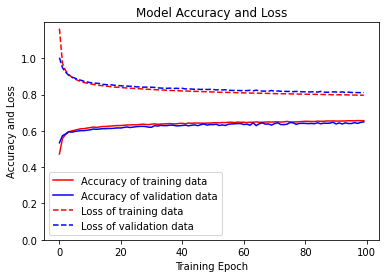

              precision    recall  f1-score   support

           0       0.63      0.60      0.62      5000
           3       0.66      0.60      0.63      5000
           9       0.68      0.77      0.72      5000

    accuracy                           0.66     15000
   macro avg       0.65      0.66      0.65     15000
weighted avg       0.65      0.66      0.65     15000



In [12]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

y_pred = model.predict(X_train)
y_train = np.argmax(y_train, axis=1)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_train,y_pred))

In [13]:
y_pred = model.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [14]:
def confusion_matrix(test, pred):

    matrix = metrics.confusion_matrix(test, pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

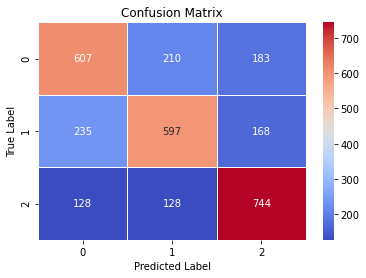

In [15]:
confusion_matrix(y_test,y_pred)

In [16]:
# Further tests